## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allocator_type = 'BFC' #A "Best-fit with coalescing" algorithm, simplified from a version of dlmalloc.
config.gpu_options.per_process_gpu_memory_fraction = 0.3
config.gpu_options.allow_growth = True
set_session(tf.Session(config=config))

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.1, 0.25, 0.5, 0.65, 0.8]

In [7]:
# Training
results = {}
for dropout in Dropout_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Dropout = %.6f" % (dropout))
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=dropout)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    name_tag_of_dropout = 'drop_rate_%.2f' % dropout
    results[name_tag_of_dropout] = {'train-loss': train_loss,
                         'valid-loss': valid_loss,
                         'train-acc' : train_acc,
                         'valid-acc' : valid_acc}

Experiment with Dropout = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128) 

Epoch 50/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.0952 - acc: 0.6119 - val_loss: 1.2758 - val_acc: 0.5438
Experiment with Dropout = 0.250000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None,

Epoch 49/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.2971 - acc: 0.5372 - val_loss: 1.3234 - val_acc: 0.5367
Epoch 50/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.2842 - acc: 0.5440 - val_loss: 1.3160 - val_acc: 0.5310
Experiment with Dropout = 0.500000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          

Epoch 48/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.5930 - acc: 0.4292 - val_loss: 1.4726 - val_acc: 0.4777
Epoch 49/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.5870 - acc: 0.4309 - val_loss: 1.4717 - val_acc: 0.4741
Epoch 50/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.5892 - acc: 0.4290 - val_loss: 1.4737 - val_acc: 0.4714
Experiment with Dropout = 0.650000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)  

Epoch 47/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.9410 - acc: 0.2474 - val_loss: 1.9296 - val_acc: 0.2678
Epoch 48/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.9407 - acc: 0.2494 - val_loss: 1.9594 - val_acc: 0.2629
Epoch 49/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.9379 - acc: 0.2524 - val_loss: 1.9356 - val_acc: 0.2640
Epoch 50/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.9384 - acc: 0.2499 - val_loss: 1.9616 - val_acc: 0.2569
Experiment with Dropout = 0.800000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropou

Epoch 46/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.1382 - acc: 0.1648 - val_loss: 2.2388 - val_acc: 0.1346
Epoch 47/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.1382 - acc: 0.1675 - val_loss: 2.2409 - val_acc: 0.1249
Epoch 48/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.1348 - acc: 0.1693 - val_loss: 2.2416 - val_acc: 0.1284
Epoch 49/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.1358 - acc: 0.1667 - val_loss: 2.2508 - val_acc: 0.1256
Epoch 50/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.1320 - acc: 0.1685 - val_loss: 2.2573 - val_acc: 0.1223


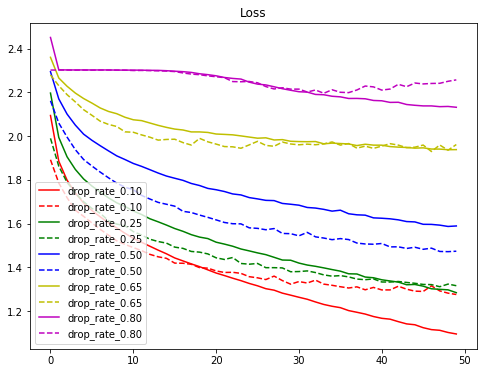

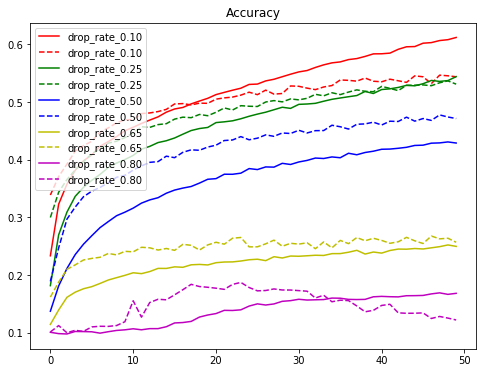

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "y", "m", "k"]
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()